## Урок 4 ОБЗОР NUMPY, PANDAS, JUPYTER. ОСНОВЫ JUPYTER
В четвертом уроке задания будут разбиты на 4 блока:

1. __Markdown__. Сначала мы научимся работать с Markdown, используя _`jupyter notebook`_.

2. __Ошибки в коде__. Здесь мы поработаем с чужим кодом, отредактируем и запустим его.

3. __Numpy__. Мы сравненим время работы цикла for и функции из библиотеки numpy для вычислении скалярного произведения векторов.

4. __Непонятная [*]__. _В заключение, мы столкнемся с зависающим кодом и применим наши знания о ядрах jupyter для решения проблемы._


## Задание 1 Markdown

### _**Степ 1**_ `Создаем ноутбук в jupyter и учимся работать с Markdown`

Jupyter Notebook поддерживает язык разметки Markdown. Это простой способ создания красиво выглядящих документов с небольшим количеством команд, которые нужно запомнить.
Данный ноутбук офрмлен с использованием Markdown. 
В ноутбуке создано несколько ячеек: с markdown-разметкой и с кодом. В markdown-ячейке использован синтаксис для __полужирного текста__, _курсива_ и `monospace`.

__Таким образом, весь этот ноутбук ответ на задание степа 1.__

## Задание 2 Ошибки в коде

### _**Степ 2**_ `Фиксим баги в коде коллеги` 
Код из задания по поиску ошибок:

In [1]:
credit_payments = []

In [2]:
# OLD experiment. todo: remove it
import pandas as pd


df = pd.DataFrame(
    [[1, 2, 3],
    [4, 5, 6]],
    columns=['num_records', 'value', 'total']
)
print(df.sum())

print(df['num_records'].value_counts())

df.head()

num_records    5
value          7
total          9
dtype: int64
1    1
4    1
Name: num_records, dtype: int64


,num_records,value,total
0,1,2,3
1,4,5,6


In [3]:
import time

start = time.time()
# Исправим указанную в задании ошибку
# credit_payments.append(5)
for i in range(int(1e5)):
    credit_payments.append((i % 7 + i // 3) / 1e6)

end = time.time()
print(end - start)
print(sum(credit_payments))

0.025843381881713867
1666.916662


### _**Степ 3**_ `Пишем воспроизводимый код`

Что можно сделать, чтобы после перезапуска последней ячейки всегда получился одинаковый результат?

__Перенести credit_payments = [] в ячейку с циклом for.__ Таким образом, каждый раз в цикле будет очищаться `credit_payments` и результат будет одинаков.

### _**Степ 4**_ `Строим графики`
Код из задания (__не работает из-за ошибки, которую надо определить!__):

In [4]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

res, res1 = [], []
for i in range(int(1e4)):
    # сгенерируем два массива из нормального распределения
    sample_1 = np.random.normal(0.3, 3, size=int(1e3))
    sample_2 = np.random.normal(0, 3, size=int(1e3))
    # тест на гипотезу: а равны ли мат.ожидания? (0.3 против 0)
    stat, p = ttest_ind(sample_1, sample_2)
    #stat, p = mannwhitneyu(sample_1, sample_2)
    res.append(stat)
    res1.append(p)
# рисуем графики на p-value (в модуле статистики узнаете, что это такое)
_ = plt.hist(res1, bins=100)

NameError: name 'plt' is not defined

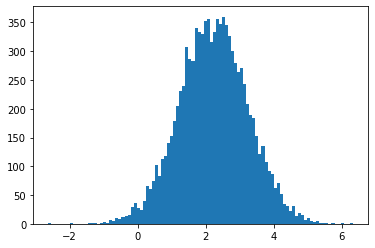

In [5]:
import matplotlib.pyplot as plt
# рисуем получающуюся статистику
_ = plt.hist(res, bins=100)

Данный код по построению графиков работает с ошибкой, т.к. в ячейке 4 используется библиотека, которая объявляется в следующей ячейке. А в ячейке 5 происходит обращение к `res`, которая пришла из 4 ячейки, что делает невозможным изменить порядок запуска ячеек. __`Решением здесь будет вставить обращение к matplotlib в начало 4 ячейки (т.е. вставить в начало к другим import'ам).`__

## Задание 3 Numpy

### _**Степ 5**_ `Применяем магические команды jupyter`

Реализуем скалярное произведение двух векторов размера `1e5` через цикл `for` в ноутбуке и замерем скорость выполнения кода с использованием магической команды `%%timeit`. Используем для быстрой генерации вектора такой трюк: `vec1 = list(range(int(1e5)))`.

In [6]:
def scalar_product(vec1, vec2):
    res = 0
    for i in range(len(vec1)):
        res += vec1[i]*vec2[i]
    return res

vec1 = list(range(int(1e5)))
vec2 = list(range(int(1e5)))
result = scalar_product(vec1, vec2)

In [7]:
%%timeit
scalar_product(vec1, vec2)

10.5 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### _**Степ 6**_ `Результат "магического" умножения`

Какой порядок (т.е. число после e+...) имеет результат скалярного произведения двух векторов из предыдущего степа?

In [8]:
"{:.2e}".format(result)

'3.33e+14'

### _**Степ 7**_ `Замеряем время работы функций в Numpy`

Теперь подключим библиотеку numpy, обернем списки, созданные на степе 5, в np.array(), затем воспользуемся встроенной функцией np.dot() для их скалярного произведения. Замерем время выполнения кода через %%timeit. Какое оно стало?

In [9]:
import numpy as np

vec1 = np.array(list(range(int(1e5))))
vec2 = np.array(list(range(int(1e5))))

In [10]:
%%timeit
dot_product = np.dot(vec1, vec2)

101 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Задание 4 Непонятная [*]

### _**Степ 8**_ `Фиксим баги в коде коллеги [2]`

Код из задания:

In [11]:
def gcd(a, b):
    if a < b:
        b, a = a, b
    while a != 0: # --место исправления (изначально стояла переменная b)
        a, b = a % b, b
    print(a)

In [12]:
gcd(121, 11) # запустим функцию выше на числах 121,11

0


In [13]:
print('success')

success


Код выполнялся слишком долго из-за __ошибки в присваивании переменных a, b внутри цикла while__. После исправления (замена переменной b на a), все успешно отработало.